# Numerical Exercises 06

In Statistical Mechanics the one-dimensional (1D) Ising Model is exactly resoluble. The Hamiltonian for a system of N spins with nearest neighbors interaction is given by (in the following I will assume units such that $\mu_B=1$ and $k_B=1$):

$$
H = 
-J\sum_{i=1}^N s_i s_{i+1}
-\frac{h}{2}\sum_{i=1}^N (s_i + s_{i+1}) 
$$

where $\{ s_i \}_{i=1,N}$ are spin variables taking values in $\{-1;1\}$, $J>0$ (ferromagnetic model),and with the assumption $s_{N+1} = s_{1}$.

The partition function for $N$ spins, $Z$, can be exactly computed and it turns out to be:

$$
Z=\sum_{\{ s_i \}} \exp \left( -\beta H\right) = \lambda_1^N + \lambda_2^N
$$

where
$\lambda_{1,2} = 
e^{\beta J} 
\cosh (\beta h) \pm \left[ e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J) \right]^{1/2}$, 
and where $\beta=\frac{1}{k_b T} = \frac{1}{T}$.
Once the partition function has been computed, the Helmholtz free energy is readly obtained as $A = -k_B T \ln Z$. All the thermodynamic quantities of interest can be deduced from $A$ or, equivalently, from $Z$:

- the **Internal Energy** per spin (with $h=0$):

$$
\frac{U(N,T)}{N} = \frac{\langle H \rangle}{N}
= \frac{1}{N} \sum_{\{ s_i \}} H \frac{\exp \left( -\beta H\right)}{Z}
= -\frac{1}{N}\frac{\partial \ln Z}{\partial \beta}
\underset{h=0}= -J \tanh (\beta J) \Biggl( \frac{1 + \tanh^{N-2} (\beta J)}{1+\tanh^N (\beta J)} \Biggl)
$$

- the **Heat Capacity** (with $h=0$):

$$
C(N,T) = \frac{\partial U(N,T)}{\partial T}
= \frac{\partial \beta}{\partial T}\frac{\partial U}{\partial \beta}
= -k_B\beta^2 \frac{\partial}{\partial \beta} \left[ \sum_{\{ s_i \}} H \frac{\exp \left( -\beta H\right)}{Z} \right] = \\
= -k_B\beta^2 \left[ -\sum_{\{ s_i \}} H^2 \frac{\exp \left( -\beta H\right)}{Z} + \sum_{\{ s_i \}} H \exp \left( -\beta H\right)\frac{\partial Z^{-1}}{\partial \beta} \right] = \\
= k_B\beta^2 \left\{ \sum_{\{ s_i \}} H^2 \frac{\exp \left( -\beta H\right)}{Z} + \left[ \sum_{\{ s_i \}} H \frac{\exp \left( -\beta H\right)}{Z}\right]\frac{1}{Z}\frac{\partial Z}{\partial \beta} \right\} =\\
= k_B\beta^2 \left\{ \sum_{\{ s_i \}} H^2 \frac{\exp \left( -\beta H\right)}{Z} - \left[ \sum_{\{ s_i \}} H \frac{\exp \left( -\beta H\right)}{Z}\right]^2 \right\} =
k_B\beta^2 \left(\langle H^2 \rangle -\langle H \rangle^2 \right)
$$

$$
\frac{C(N,T)}{N} = \frac{1}{N}\frac{\partial U(N,T)}{\partial T} =\\
\underset{h=0}= 
k_B (\beta J)^2 \left\{ 1+\tanh^N (\beta J)+(N-1)\tanh^2 (\beta J)+(N-1)\frac{\tanh^{N-2} (\beta J)}{1+\tanh^N (\beta J)}
- N \left[ \frac{\tanh (\beta J) + \tanh^{N-1} (\beta J)}{1+\tanh^N (\beta J)} \right]^2 \right\}
$$

- The **magnetization** (with $h \not= 0$):

Note that with $h=0$ the magnetization $M(N,T,h=0)=\langle \sum_{i=1,N}s_i \rangle =0$ because in 1D we cannot have a (ferromagnetic) phase transition in absence of an external magnetic field.

$$
M(N,T,h) = -\frac{\partial A}{\partial h} = k_B T \frac{\partial \ln Z}{\partial h} =
\frac{1}{\beta} \frac{1}{Z}\frac{\partial}{\partial h}\sum_{\{ s_i \}} \exp \left( -\beta H\right) = \sum_{\{ s_i \}} \left[ \sum_{i=1,N}s_i\right] \frac{\exp \left( -\beta H\right)}{Z} = \left\langle \sum_{i=1,N}s_i \right\rangle
$$

The exact formula from $M(N,T,h) = k_B T \dfrac{\partial \ln Z}{\partial h}$ is:
$$
\frac{M(N,T,h)}{N}=\frac{e^{\beta J}\; \sinh(\beta h)}{Z} \; \Bigl[\lambda_1^{N-1}\cdot \Bigl(1+\frac{e^{\beta J}\; \cosh(\beta h)}{\sqrt{e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J)}}\Bigr) + \lambda_2^{N-1}\cdot \Bigl(1-\frac{e^{\beta J}\; \cosh(\beta h)}{\sqrt{e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J)}}\Bigr)\Bigr]
$$

- The **magnetic susceptibility** (with $h=0$):

$$
\chi(N,T) = \frac{\partial M}{\partial h} = 
\frac{\partial}{\partial h}\sum_{\{ s_i \}} \left[ \sum_{i=1,N}s_i\right] \frac{\exp \left( -\beta H\right)}{Z} =\\
= \beta\sum_{\{ s_i \}} \left[ \sum_{i=1,N}s_i\right]^2 \frac{\exp \left( -\beta H\right)}{Z}
-\sum_{\{ s_i \}} \left[ \sum_{i=1,N}s_i\right] \frac{\exp \left( -\beta H\right)}{Z}
\frac{1}{Z}\frac{\partial Z}{\partial h} = 
\beta \left[ \left\langle \left( \sum_{i=1,N}s_i \right)^2 \right\rangle - \left\langle \sum_{i=1,N}s_i \right\rangle^2 \right] = \\
\underset{h=0}= \beta \left[ \left\langle \left( \sum_{i=1,N}s_i \right)^2 \right\rangle \right] = \beta e^{2\beta J} \Biggl( \frac{1-\tanh^N (\beta J)}{1+\tanh^N (\beta J)} \Biggl)
$$

## Exercise 06.1

Complete the NSL_simulator code to simulate a 1D Ising model with the Gibbs sampling algorithm (the Metropolis algorithm is already implemented) to sample the Boltzmann's weight $p(\{ s_i \}) = \exp(-\beta H)/Z$. Verify the possibility to restart from a previous spin configuration.

The code already computes the internal energy: $U(N,T) = \langle H \rangle$. Add the calculation of $C(N,T)$, $\chi(N,T)$, $M(N,T,h)$ and compute:
1. $U(N,T) = \langle H \rangle_{h=0}$
2. $C(N,T) = k_B \beta^2 (\langle H^2 \rangle_{h=0}-\langle H \rangle_{h=0}^2)$ 
3. $\chi(N,T) = \beta \langle (\sum_{i=1,N}s_i)^2 \rangle_{h=0}$
4. $M(N,T,h=0.02)= \langle \sum_{i=1,N}s_i \rangle_{h=0.02}$

as a function of $T$ in the range $\left[0.5;2.0\right]$ for a system of $N=50$ spins with $J=1$.

As usual, use data blocking and give an estimate of the statistical uncertainties.

- <span style="color:red">Show pictures of your estimations of $U(N,T)$, $C(N,T)$, $\chi(N,T)$, $M(N,T,h=0.02)$ and their uncertainties</span> obtained with a large number of *MC steps* (e.g. $M\ge 10^5$) compared with the exact curves. In the same picture show your results obtained with <span style="color:blue">both sampling methods, Metropolis and Gibbs</span>.

A Monte Carlo step will consist in trying to flip one time all the spins of the system. Do not forget to equilibrate your simulations and to use blocking average with blocks large enough.

## Solution

In this numerical exercise, we will simulate the 1D Ising model using Monte Carlo methods. Concretely, we will use two different techniques which allows to sample the Boltzmann distribution in order to compute the thermodynamic quantities of interest.

### Metropolis Sampling

As mentioned in the previous exercise, the Metropolis algorithm is a Markov Chain Monte Carlo (MCMC) method used to sample from a probability distribution. The algorithm generates a sequence of samples from the target distribution by proposing new states and accepting or rejecting them based on a probability that depends on the energy difference between the current and proposed states.

In the context of the 1D Ising model, a Metropolis step update for a single spin flip is given by the acceptance ratio:

$$\text{acceptance} = e^{-\beta \Delta E}$$

where 

$$\Delta E = 2.0 \cdot s_i \cdot \left( J \cdot (s_{i-1} + s_{i+1}) + H \right)$$

is the energy difference between the current state and the proposed state after flipping the spin $s_i$.

### Gibbs Sampling

Gibbs sampling is a Markov Chain Monte Carlo (MCMC) method used to generate samples from a multivariate probability distribution when direct sampling is difficult. Is similar to the Metropolis algorithm, but instead of proposing a new state and accepting or rejecting it based on a probability, Gibbs sampling updates each variable in the system one at a time, conditioned on the current values of the other variables. 

In the context of the 1D Ising model, a Gibbs sampling step update for a single spin undergoes to the conditional probability:

$$
p(s_k' = \pm 1 | s_j : j \neq k) = \frac{1}{1 + \exp\left(\mp 2\beta J \sum_{j \in \text{neighbors}} s_j\right)} 
$$

In `System.cpp` i've implemented the gibbs sampling for the single particle move.

```c++
void System :: move(int i){
    if(_sim_type == 3){ //Gibbs sampler for Ising
        double d_E = 2.0 * _beta * ( _J * (_particle(this->pbc(i-1)).getspin() + _particle(this->pbc(i+1)).getspin()) + _H);
        // conditional probability of the spin flip
        (_rnd.Rannyu() < (1./ (1. + exp(-d_E)))) ? _particle(i).setspin(1) : _particle(i).setspin(-1);
        _naccepted++;
    }
/* ... */
}   
```
we can see that in the gibbs sampling the acceptance ratio is always 1, this is because the sampling takes values from the exact conditional probability distribution.


### Observables

The requested observables are mainly computed in `System::measure()` and in `System::averages()` in particular:

TOTAL ENERGY
```cpp
// TOTAL ENERGY (kinetic+potential) //////////////////////////////////////////
if (_measure_tenergy or _measure_cv){ // for the heat capacity we need <H>
    if (_sim_type < 2) _measurement(_index_tenergy) = kenergy_temp +penergy_temp;
    else { 
        double s_i, s_j;
        for (int i=0; i<_npart; i++){
        s_i = double(_particle(i).getspin());
        s_j = double(_particle(this->pbc(i+1)).getspin());
        tenergy_temp += - _J * s_i * s_j - 0.5 * _H * (s_i + s_j);
        }
        tenergy_temp /= double(_npart);
    }
    if(_measure_tenergy) _measurement(_index_tenergy) = tenergy_temp;
}
```

MAGNETIZATION
```cpp
// MAGNETIZATION /////////////////////////////////////////////////////////////
  if(_measure_magnet or _measure_chi){
    for(int i=0; i<_npart; i++){
      magnetization += double(_particle(i).getspin());
    }
    if (_measure_magnet) _measurement(_index_magnet) = magnetization;
}
```


SUSCEPTIBILITY
```cpp
// SUSCEPTIBILITY ////////////////////////////////////////////////////////////
if(_measure_chi ){
    double chi_temp = magnetization*magnetization * _beta / double(_npart);
_measurement(_index_chi) = chi_temp;
}
```


HEAT CAPACITY
```cpp
// SPECIFIC HEAT /////////////////////////////////////////////////////////////
if (_measure_cv){
  _measurement(_index_cv) = pow(tenergy_temp * double(_npart),2); // <H^2>
}

// in System::averages()

if(_measure_cv){ 
    // subtract <H>^2 to the block average and multiply by beta^2
    _block_av(_index_cv) -= pow(_block_av(_index_tenergy) * double(_npart), 2) / double(_nsteps);
    _block_av(_index_cv) *= _beta * _beta;
  }
```



### Simulations

For the equilibration of the system, a dedicated executable, `equilibration`, was developed. This program performs the simulation for a specified number of steps and subsequently stores the resulting configuration in a designated file. This file then serves as an initial configuration for subsequent simulations, enabling the `NSL_SIMULATOR` program to start from an already equilibrated state.

Following the initial equilibration, the `NSL_SIMULATOR` executable was utilized with the `RESTART` flag set to `1`, instructing the program to load the initial configuration from the file generated during the equilibration phase.    
To automate this process across a range of temperatures, a `for` loop iterating over temperature values was implemented within the `main.cpp` file. Given the small incremental temperature increase of `0.1` between successive simulations, re-equilibration of the system is not required, and sampling can proceed directly from the current state.



### Results

Here i present the results obtained from the simulation of the 1D Ising model using both the Metropolis and Gibbs sampling methods. The temperature range was set from $T=0.5$ to $T=2.0$, with a step size of $0.1$.

For the data blocking i choose a block size of $10^4$ and $100$ blocks. In the following plots i will show the final values of the observables after the blocking procedure with both sampling methods.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')
plt.rcParams['font.size'] = 10
plt.rcParams['font.family'] = 'serif'

In [2]:
# define function for exact values
def internal_energy(T):
    beta = 1/T
    b = 1/T
    h = 0.02
    J = 1.0
    Ns = 50
    th = np.tanh(J/T)
    thN= th**Ns
    ch = 1/th   
    return -J*( th + ch*thN )/( 1 + thN )

def heat_capacity(T):
    beta = 1/T
    b = 1/T
    h = 0.02
    J = 1.0
    Ns = 50
    th = np.tanh(J/T)
    thN= th**Ns
    ch = 1/th   
    return ((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)

def mag(T):
    beta = 1/T
    b = 1/T
    h = 0.02
    J = 1.0
    Ns = 50
    l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
    l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
    Z = l1**Ns + l2**Ns
    return (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)

def susceptibility(T):
    beta = 1/T
    b = 1/T
    h = 0.02
    J = 1.0
    Ns = 50
    th = np.tanh(J/T)
    thN= th**Ns
    ch = 1/th  
    return beta*np.exp(2*beta*J)*(1-thN)/(1+thN)

n_blocks = 20
sample_size = 16

In [3]:
temp_list = np.linspace(0.5, 2.0, sample_size)
mag_data_gibbs = pd.concat(
    [pd.read_csv(f'NSL_SIMULATOR/OUTPUT/GIBBS/magnetization_{t:.1f}.dat', delim_whitespace=True).iloc[n_blocks-1:n_blocks].assign(T=t) for t in temp_list],
    ignore_index=True
)

cv_data_gibbs = pd.concat(
    [pd.read_csv(f'NSL_SIMULATOR/OUTPUT/GIBBS/specific_heat_{t:.1f}.dat', delim_whitespace=True).iloc[n_blocks-1:n_blocks].assign(T=t) for t in temp_list],
    ignore_index=True
)

chi_data_gibbs = pd.concat(
    [pd.read_csv(f'NSL_SIMULATOR/OUTPUT/GIBBS/susceptibility_{t:.1f}.dat', delim_whitespace=True).iloc[n_blocks-1:n_blocks].assign(T=t) for t in temp_list],
    ignore_index=True
)

energy_data_gibbs = pd.concat(
    [pd.read_csv(f'NSL_SIMULATOR/OUTPUT/GIBBS/total_energy_{t:.1f}.dat', delim_whitespace=True).iloc[n_blocks-1:n_blocks].assign(T=t) for t in temp_list],
    ignore_index=True
)

In [4]:
mag_data_metro = pd.concat(
    [pd.read_csv(f'NSL_SIMULATOR/OUTPUT/METROPOLIS/magnetization_{t:.1f}.dat', delim_whitespace=True).iloc[n_blocks-1:n_blocks].assign(T=t) for t in temp_list],
    ignore_index=True
)

cv_data_metro = pd.concat(
    [pd.read_csv(f'NSL_SIMULATOR/OUTPUT/METROPOLIS/specific_heat_{t:.1f}.dat', delim_whitespace=True).iloc[n_blocks-1:n_blocks].assign(T=t) for t in temp_list],
    ignore_index=True
)

chi_data_metro = pd.concat(
    [pd.read_csv(f'NSL_SIMULATOR/OUTPUT/METROPOLIS/susceptibility_{t:.1f}.dat', delim_whitespace=True).iloc[n_blocks-1:n_blocks].assign(T=t) for t in temp_list],
    ignore_index=True
)

energy_data_metro = pd.concat(
    [pd.read_csv(f'NSL_SIMULATOR/OUTPUT/METROPOLIS/total_energy_{t:.1f}.dat', delim_whitespace=True).iloc[n_blocks-1:n_blocks].assign(T=t) for t in temp_list],
    ignore_index=True
)

In [5]:
T = np.linspace(0.2, 3.0, 100)
internal_energy_values = [internal_energy(t) for t in T]
heat_capacity_values = [heat_capacity(t) for t in T]
magnetization_values = [mag(t) for t in T]
susceptibility_values = [susceptibility(t) for t in T]

T2 = np.linspace(0.5, 2.0, 16)
internal_energy_values2 = [internal_energy(t) for t in T2]
heat_capacity_values2 = [heat_capacity(t) for t in T2]
magnetization_values2 = [mag(t) for t in T2]
susceptibility_values2 = [susceptibility(t) for t in T2]

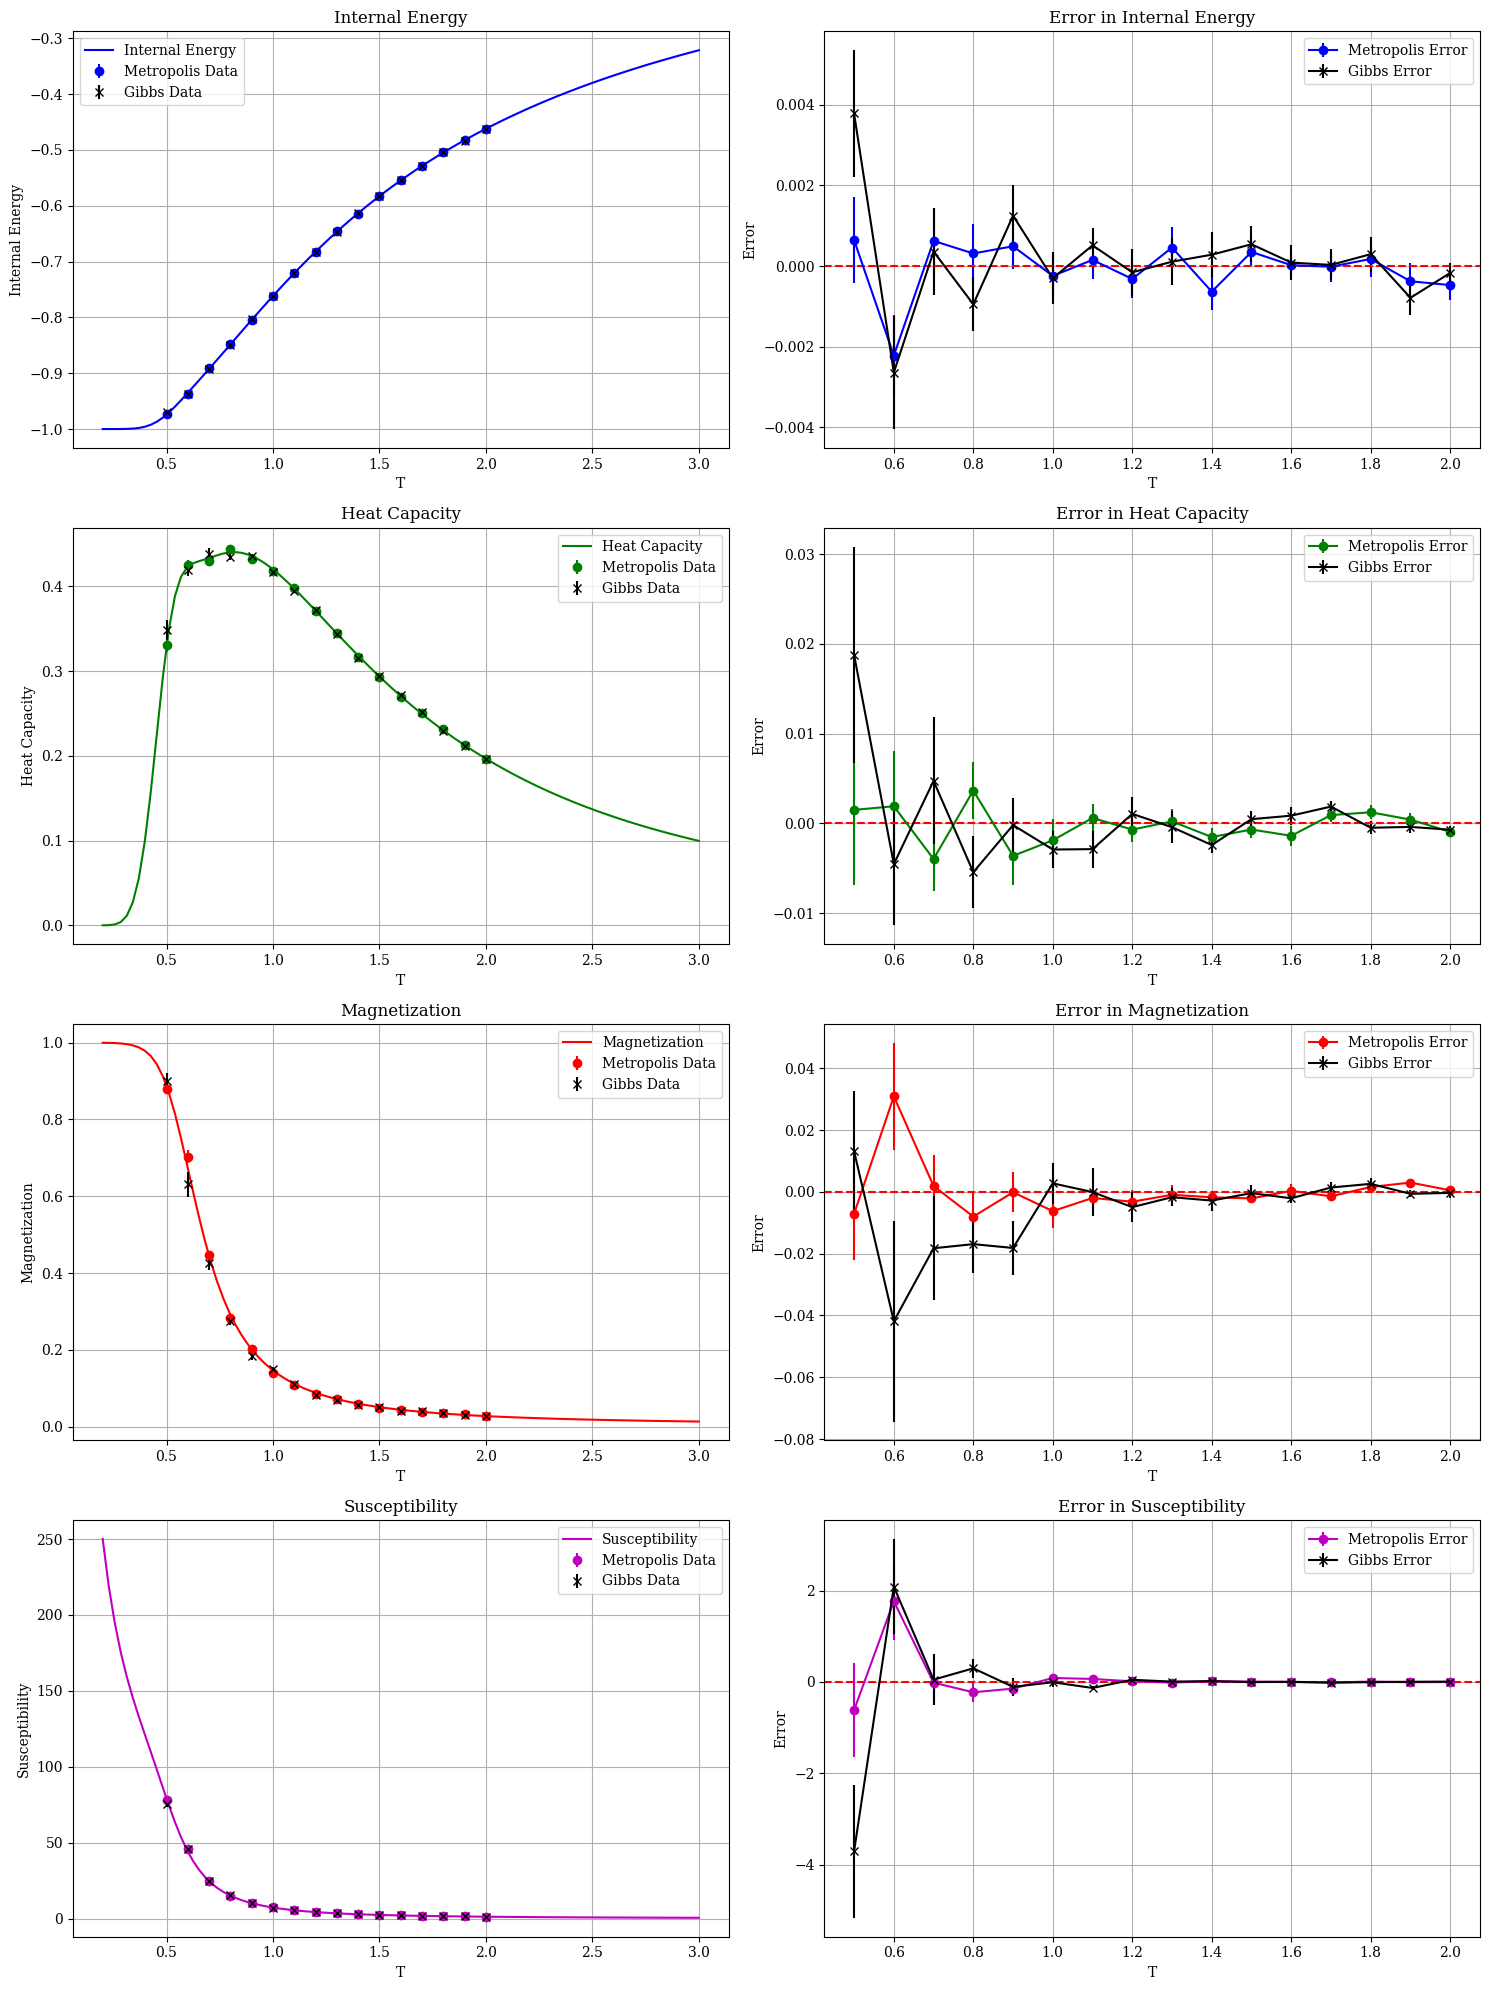

In [6]:
fig, axs = plt.subplots(4, 2, figsize=(15, 20), gridspec_kw={'width_ratios': [1, 1]})

# Internal Energy
axs[0, 0].plot(T, internal_energy_values, label='Internal Energy', color='b')
axs[0, 0].errorbar(energy_data_metro['T'], energy_data_metro['TE_AVE:'], yerr=energy_data_metro['ERROR:'], fmt='o', ls='none', color='b', label='Metropolis Data')
axs[0, 0].errorbar(energy_data_gibbs['T'], energy_data_gibbs['TE_AVE:'], yerr=energy_data_gibbs['ERROR:'], fmt='x', ls='none', color='black', label='Gibbs Data')
axs[0, 0].set_title('Internal Energy')
axs[0, 0].set_xlabel('T')
axs[0, 0].set_ylabel('Internal Energy')
axs[0, 0].grid()
axs[0, 0].legend()

axs[0, 1].errorbar(energy_data_metro['T'], energy_data_metro['TE_AVE:'] - internal_energy_values2, yerr = energy_data_metro['ERROR:'],fmt = '-o' ,color='b', label='Metropolis Error')
axs[0, 1].errorbar(energy_data_gibbs['T'], energy_data_gibbs['TE_AVE:'] - internal_energy_values2, yerr = energy_data_gibbs['ERROR:'], fmt='-x', color='black', label='Gibbs Error')
axs[0, 1].axhline(0., color='red', lw=1.5, ls='--')
axs[0, 1].set_title('Error in Internal Energy')
axs[0, 1].set_xlabel('T')
axs[0, 1].set_ylabel('Error')
axs[0, 1].grid()
axs[0, 1].legend()

# Heat Capacity
axs[1, 0].plot(T, heat_capacity_values, label='Heat Capacity', color='g')
axs[1, 0].errorbar(energy_data_metro['T'], cv_data_metro['CV_AVE:'], yerr=cv_data_metro['ERROR:'], fmt='o', ls='none', color='g', label='Metropolis Data')
axs[1, 0].errorbar(energy_data_gibbs['T'], cv_data_gibbs['CV_AVE:'], yerr=cv_data_gibbs['ERROR:'], fmt='x', ls='none', color='black', label='Gibbs Data')
axs[1, 0].set_title('Heat Capacity')
axs[1, 0].set_xlabel('T')
axs[1, 0].set_ylabel('Heat Capacity')
axs[1, 0].grid()
axs[1, 0].legend()

axs[1, 1].errorbar(energy_data_metro['T'], cv_data_metro['CV_AVE:'] - heat_capacity_values2, yerr=cv_data_metro['ERROR:'], fmt='-o', color='g', label='Metropolis Error')
axs[1, 1].errorbar(energy_data_gibbs['T'], cv_data_gibbs['CV_AVE:'] - heat_capacity_values2, yerr=cv_data_gibbs['ERROR:'], fmt='-x', color='black', label='Gibbs Error')
axs[1, 1].axhline(0., color='red', lw=1.5, ls='--')
axs[1, 1].set_title('Error in Heat Capacity')
axs[1, 1].set_xlabel('T')
axs[1, 1].set_ylabel('Error')
axs[1, 1].grid()
axs[1, 1].legend()

# Magnetization
axs[2, 0].plot(T, magnetization_values, label='Magnetization', color='r')
axs[2, 0].errorbar(energy_data_metro['T'], mag_data_metro['M_AVE:'], yerr=mag_data_metro['ERROR:'], fmt='o', ls='none', color='r', label='Metropolis Data')
axs[2, 0].errorbar(energy_data_gibbs['T'], mag_data_gibbs['M_AVE:'], yerr=mag_data_gibbs['ERROR:'], fmt='x', ls='none', color='black', label='Gibbs Data')
axs[2, 0].set_title('Magnetization')
axs[2, 0].set_xlabel('T')
axs[2, 0].set_ylabel('Magnetization')
axs[2, 0].grid()
axs[2, 0].legend()

axs[2, 1].errorbar(energy_data_metro['T'], mag_data_metro['M_AVE:'] - magnetization_values2, yerr=mag_data_metro['ERROR:'], fmt='-o', color='r', label='Metropolis Error')
axs[2, 1].errorbar(energy_data_gibbs['T'], mag_data_gibbs['M_AVE:'] - magnetization_values2, yerr=mag_data_gibbs['ERROR:'], fmt='-x', color='black', label='Gibbs Error')
axs[2, 1].axhline(0., color='red', lw=1.5, ls='--')
axs[2, 1].set_title('Error in Magnetization')
axs[2, 1].set_xlabel('T')
axs[2, 1].set_ylabel('Error')
axs[2, 1].grid()
axs[2, 1].legend()

# Susceptibility
axs[3, 0].plot(T, susceptibility_values, label='Susceptibility', color='m')
axs[3, 0].errorbar(energy_data_metro['T'], chi_data_metro['X_AVE:'], yerr=chi_data_metro['ERROR:'], fmt='o', ls='none', color='m', label='Metropolis Data')
axs[3, 0].errorbar(energy_data_gibbs['T'], chi_data_gibbs['X_AVE:'], yerr=chi_data_gibbs['ERROR:'], fmt='x', ls='none', color='black', label='Gibbs Data')
axs[3, 0].set_title('Susceptibility')
axs[3, 0].set_xlabel('T')
axs[3, 0].set_ylabel('Susceptibility')
axs[3, 0].grid()
axs[3, 0].legend()

axs[3, 1].errorbar(energy_data_metro['T'], chi_data_metro['X_AVE:'] - susceptibility_values2, yerr=chi_data_metro['ERROR:'], fmt='-o', color='m', label='Metropolis Error')
axs[3, 1].errorbar(energy_data_gibbs['T'], chi_data_gibbs['X_AVE:'] - susceptibility_values2, yerr=chi_data_gibbs['ERROR:'], fmt='-x', color='black', label='Gibbs Error')
axs[3, 1].axhline(0., color='red', lw=1.5, ls='--')
axs[3, 1].set_title('Error in Susceptibility')
axs[3, 1].set_xlabel('T')
axs[3, 1].set_ylabel('Error')
axs[3, 1].grid()
axs[3, 1].legend()

plt.tight_layout()
plt.show()

### Observations

- The results obtained from the Metropolis and Gibbs sampling methods are in good agreement with the exact results,

- From the error plots we can see that both methods struggle to converge at low temperatures, i think this is due to the fact that the random moves (weighted by the energy which depends on the temperature) are not enough to explore the configuration space of the system. 

- The Metropolis method seems to work better rather than the Gibbs sampling method.